# Next Word Prediction
## by- Tamal Majumder
* **[LINKEDIN](https://www.linkedin.com/in/tamal-majumder-4979781a3/)**
* **[GITHUB](https://github.com/t-majumder)**

### Steps Taken: 
* Loading the data
* Data Preprocessing
* Generating our features and labels
* Creating the model
* Training the model
* Saving our model
* Loading our model
* Model Evaluation
* Functions to get next probable characters
* Finally prediction of words

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
import warnings as wg
wg.filterwarnings("ignore") 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

### Loading the data

In [2]:
#Loading the data
text = open('D:\\Data science and ml projects\\8.Next Word Prediction\\1661-0.txt', encoding="utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


### Data Preprocessing

In [3]:
#Data Preprocessing
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 73


In [4]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


### Generating our features and labels

In [5]:
# generating our features and labels
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

'e'

In [6]:
#one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [7]:
#one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [8]:
X.shape

(193950, 40, 73)

In [9]:
y.shape

(193950, 73)

### Creating the model

In [10]:
# Creating the model
model = Sequential()
model.add(LSTM(500, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 500)               1148000   
                                                                 
 dense (Dense)               (None, 73)                36573     
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 1,184,573
Trainable params: 1,184,573
Non-trainable params: 0
_________________________________________________________________


### Training our model

In [14]:
# Training our model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=10, 
                    shuffle=True).history

Epoch 1/10
1501/1501 [==============================] - 133s 87ms/step - loss: 1.7433 - accuracy: 0.4819 - val_loss: 2.0685 - val_accuracy: 0.4500
Epoch 2/10
1501/1501 [==============================] - 132s 88ms/step - loss: 1.4793 - accuracy: 0.5546 - val_loss: 1.9155 - val_accuracy: 0.4948
Epoch 3/10
1501/1501 [==============================] - 140s 94ms/step - loss: 1.3709 - accuracy: 0.5825 - val_loss: 1.9383 - val_accuracy: 0.4938
Epoch 4/10
1501/1501 [==============================] - 133s 88ms/step - loss: 1.3054 - accuracy: 0.5994 - val_loss: 1.9321 - val_accuracy: 0.4732
Epoch 5/10
1501/1501 [==============================] - 129s 86ms/step - loss: 1.2562 - accuracy: 0.6113 - val_loss: 1.9202 - val_accuracy: 0.5093
Epoch 6/10
1501/1501 [==============================] - 135s 90ms/step - loss: 1.2145 - accuracy: 0.6229 - val_loss: 1.9847 - val_accuracy: 0.4918
Epoch 7/10
1501/1501 [==============================] - 142s 94ms/step - loss: 1.1633 - accuracy: 0.6367 - val_loss: 1

### Saving our model

In [15]:
#saving our model
model.save('Downloads/nextword.h5')
pickle.dump(history, open("history.p", "wb"))

### Loading our model

In [16]:
#loading our model
model = load_model('Downloads/nextword.h5')
history = pickle.load(open("history.p", "rb"))

### Model Evaluation

In [17]:
#Model Evaluation
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 86s 14ms/step - loss: 1.7968 - accuracy: 0.5282
Test Loss 1.7968276739120483
Test Accuracy 0.528161883354187


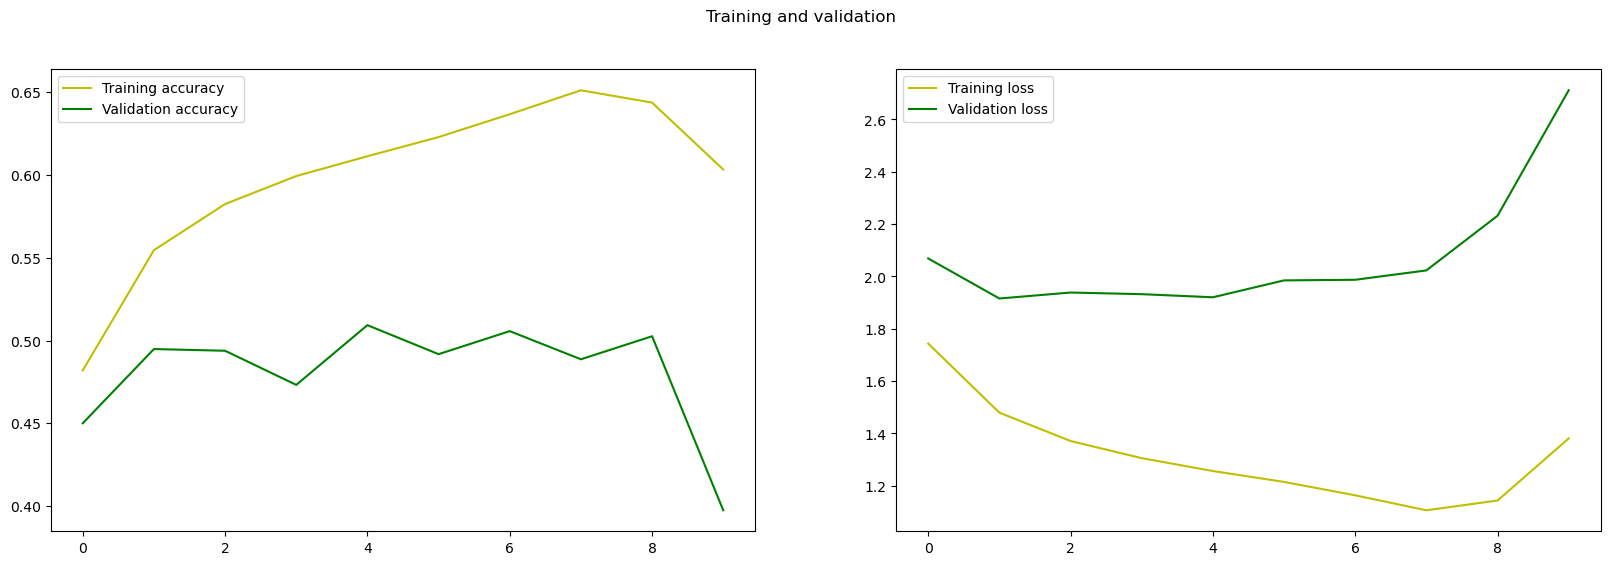

In [18]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [19]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### Functions to get next probable characters

In [20]:
#functions to get next probable characters
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [21]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [22]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

### Prediction

In [23]:
#Prediction
quotes = [   
    "I have been planning my vacation for months, and I finally booked a flight to Kashmir.",
    "A Neural Network That Can Read Handwriting is a type of artificial neural network designed to recognize and interpret handwritten characters or digits.",
    "Statistics are defined as numerical data, and is the field of math that deals with the collection, tabulation and interpretation of numerical data.",
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "The Master of Science (MSc) in Physics program at IIT Madras requires students to undertake a research project in the second year of the program, under the guidance of a faculty member.",
    "Machine learning is the science of getting computers to act without being explicitly programmed.",
    "Statistics are defined as numerical data, and is the field of math that deals with the collection, tabulation and interpretation of numerical data."
    ]

In [24]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

i have been planning my vacation for mon
['th ', 'ey, ', 'day ', 'shary ', 'nisekent ']

a neural network that can read handwriti
['ng ', 'on. ', 'c, ', 's ', 'lg ']

statistics are defined as numerical data
['\nfropt ', 'te ', '. ', ', ', 's ']

deep learning is subset of machine learn
['ed ', 's.”\n\n“how’s ', ' at ', 'ly. ', ', ']

the master of science (msc) in physics p
['resent, ', 'erhmanaty ', 'ull ', 'oint ', 'het ']

machine learning is the science of getti
['s ', 'nger ', 'c ', 'ling ', 'ting ']

statistics are defined as numerical data
['\nfropt ', 'te ', '. ', ', ', 's ']

